In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [32]:
# Import modules from src
import sys
sys.path.append('../src/')  # Add src to path
import pandas as pd

In [33]:
df = pd.read_csv('../datasets/processed/sentiment_theme.csv', parse_dates=['date'])

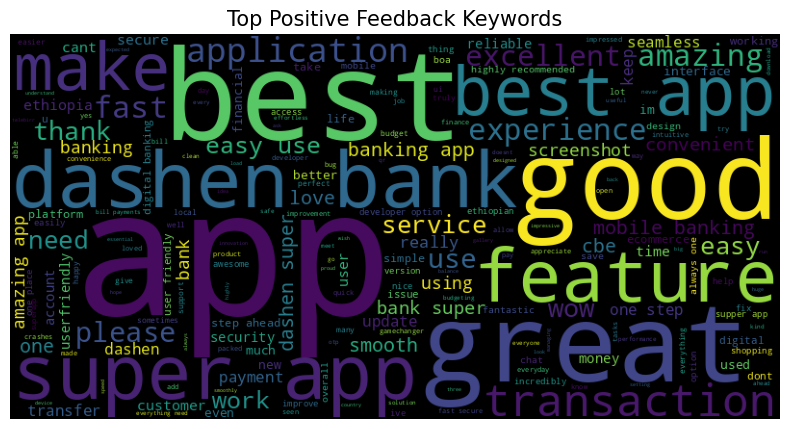

In [34]:
# Top positive keywords
positive_reviews = df[df['sentiment'] > 0.5]
wc = WordCloud(width=800, height=400).generate(' '.join(positive_reviews['processed_review']))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.title('Top Positive Feedback Keywords', fontsize=15)
plt.axis('off')
plt.show()

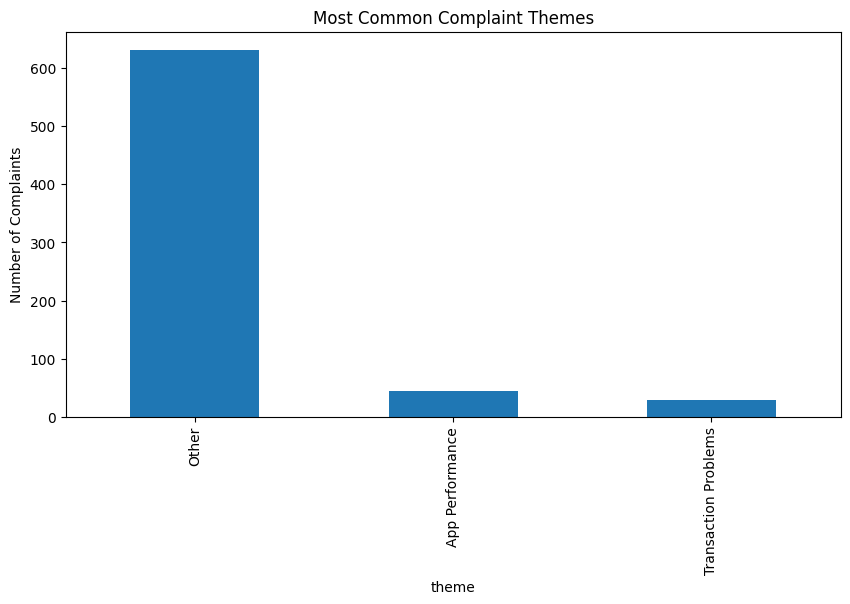

In [35]:
negative_reviews = df[df['sentiment'] < 0.3]
pain_points = negative_reviews.groupby('theme')['review'].count().sort_values(ascending=False)
pain_points.plot(kind='bar', title='Most Common Complaint Themes', figsize=(10,5))
plt.ylabel('Number of Complaints')
plt.show()

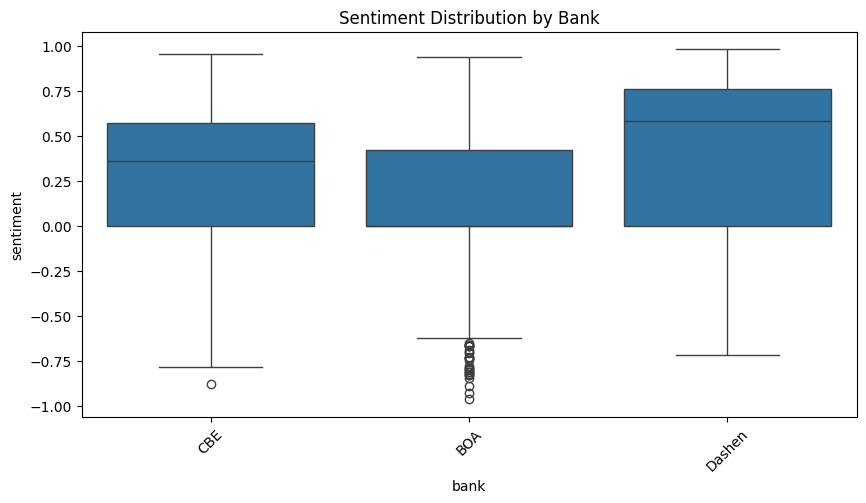

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='bank', y='sentiment')
plt.title('Sentiment Distribution by Bank')
plt.xticks(rotation=45)
plt.show()

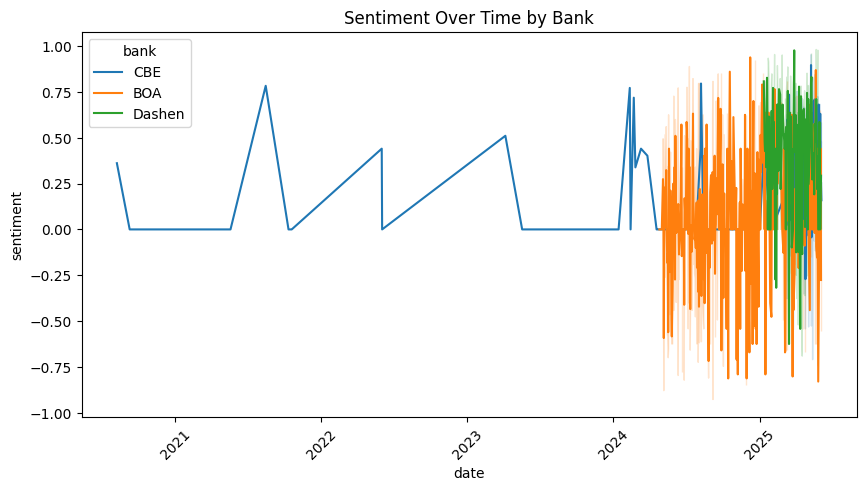

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='date', y='sentiment', hue='bank')
plt.title('Sentiment Over Time by Bank')
plt.xticks(rotation=45)
plt.show()

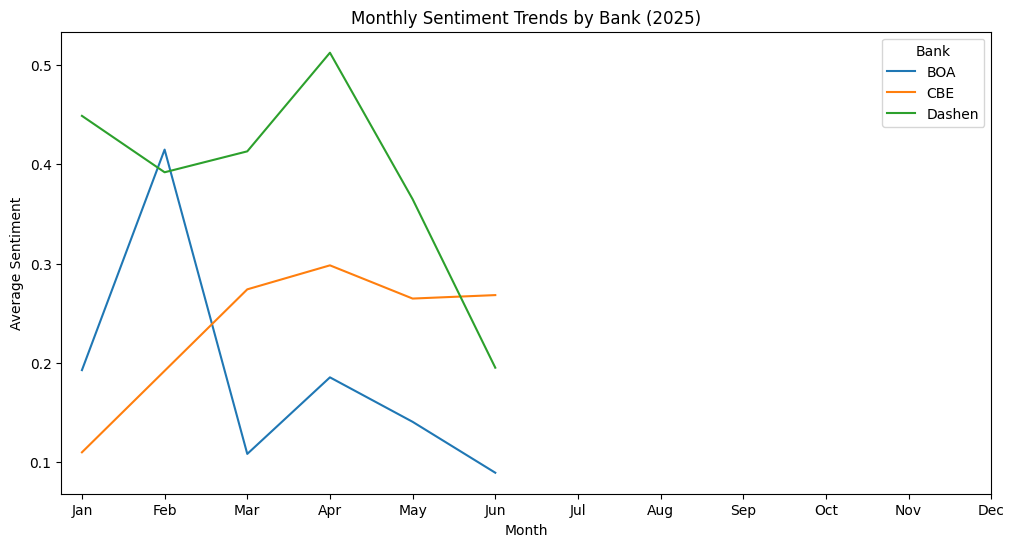

In [38]:
# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Filter for 2025 only
df_2025 = df[df['year'] == 2025]

# Group and calculate average sentiment
monthly_sentiment_2025 = df_2025.groupby(['month', 'bank'])['sentiment'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sentiment_2025, x='month', y='sentiment', hue='bank', markers=True)
plt.title('Monthly Sentiment Trends by Bank (2025)')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Bank')
plt.show()


In [39]:
df['month']

0       6
1       6
2       6
3       6
4       6
       ..
1432    1
1433    1
1434    1
1435    1
1436    1
Name: month, Length: 1437, dtype: int32

In [40]:
df.dropna(subset=['processed_review'], inplace=True)

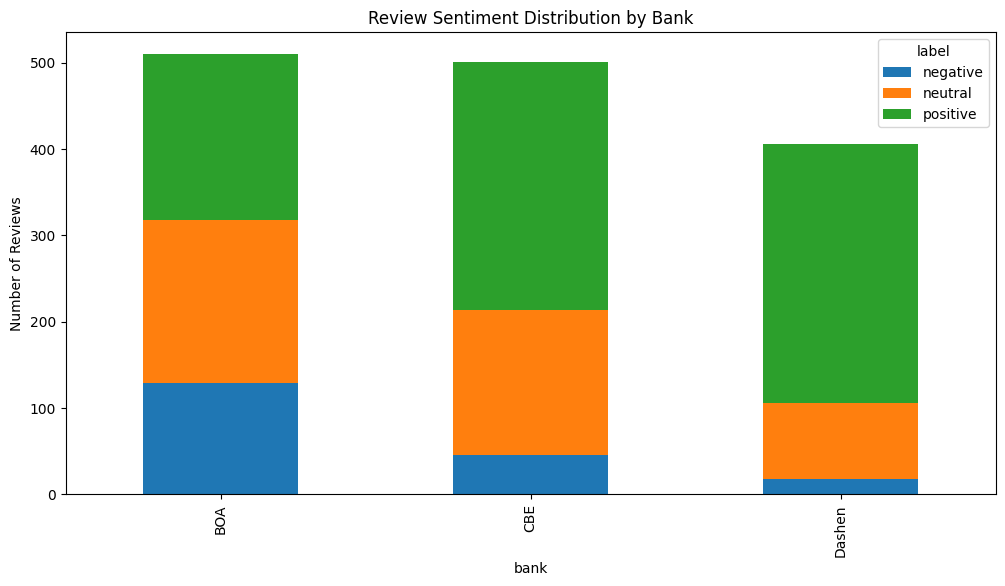

In [41]:
rating_comparison = df.groupby(['bank','label'])['review'].count().unstack()
rating_comparison.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Review Sentiment Distribution by Bank')
plt.ylabel('Number of Reviews')
plt.show()

265 reviews mention performance positive Reviews


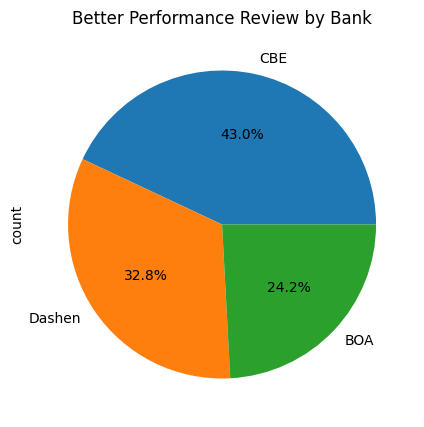

In [ ]:
performance_good = df[df['processed_review'].str.contains('good|best|faster', case=False)]
print(f"{len(performance_good)} reviews mention performance positive Reviews")
plt.figure(figsize=(8,5))
performance_good['bank'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Better Performance Review by Bank')
plt.show()

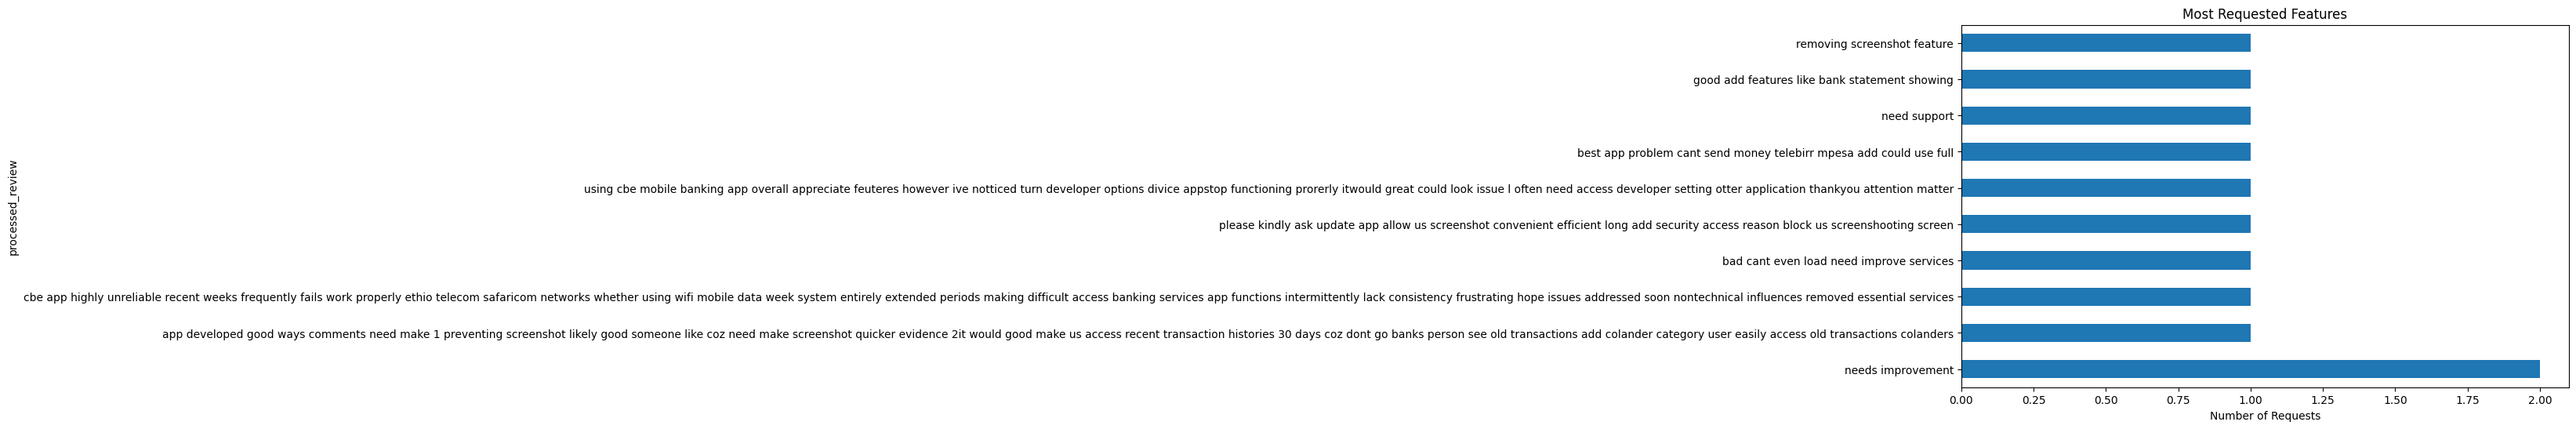

In [16]:
feature_requests = df[df['processed_review'].str.contains('add|need|want|feature', case=False)]
top_requests = feature_requests['processed_review'].value_counts().head(10)
top_requests.plot(kind='barh', figsize=(10,6))
plt.title('Most Requested Features')
plt.xlabel('Number of Requests')
plt.show()

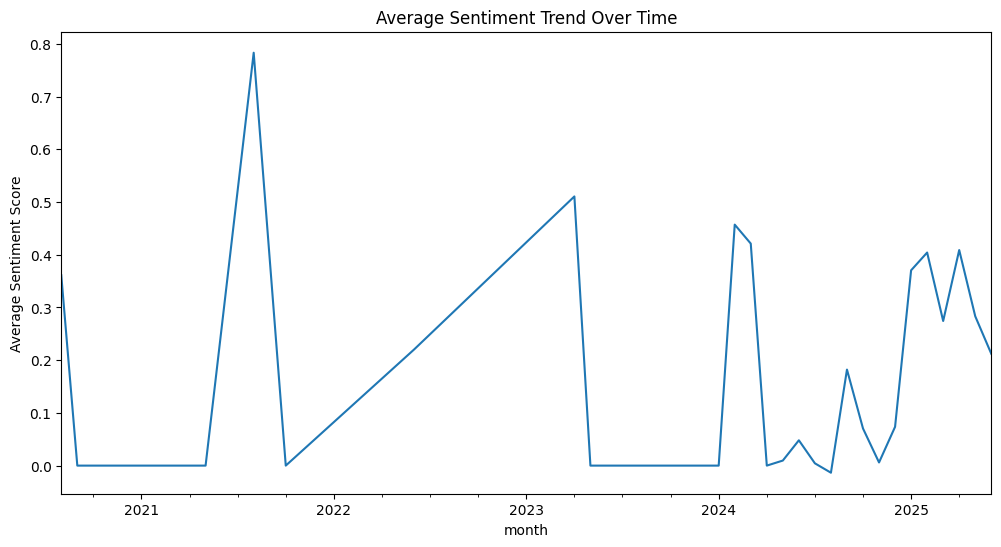

In [17]:
df['month'] = df['date'].dt.to_period('M')
sentiment_trend = df.groupby('month')['sentiment'].mean()
sentiment_trend.plot(figsize=(12,6))
plt.title('Average Sentiment Trend Over Time')
plt.ylabel('Average Sentiment Score')
plt.show()

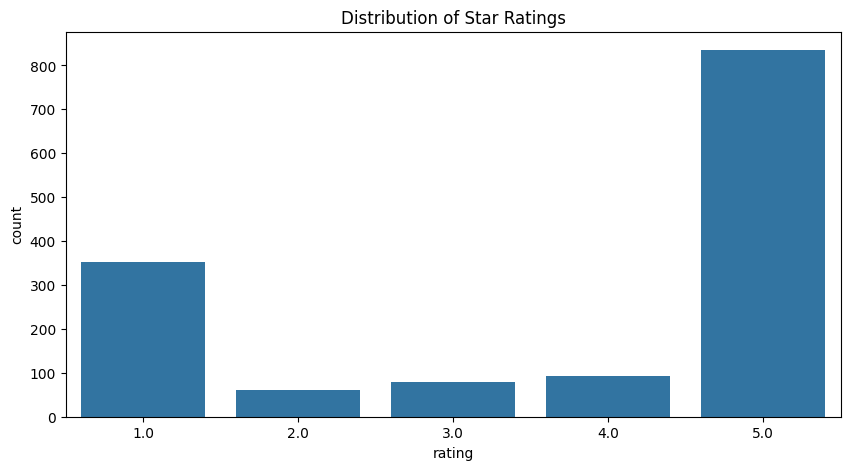

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating')
plt.title('Distribution of Star Ratings')
plt.show()